# Análise Histórica da Copa do Mundo: Campeões, Estatísticas e Tendências (1930-2014)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import plotly.express as px
import matplotlib.image as mpimg

from google.colab import drive
from wordcloud import WordCloud
from PIL import Image
from plotly.offline import iplot


drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# pelo Google Colaboratory, o caminho para a pasta é /content/drive/My Drive/world-cup-archives
df_world_cup = pd.read_csv('/content/drive/My Drive/world-cup-archives/WorldCups.csv', sep=',')

# pelo Jupyter Notebook, o caminho para a pasta é ./database
# df_world_cup = pd.read_csv('./database/WorldCups.csv', sep=',')

df_world_cup.columns = ['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth', 'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance']
df_world_cup = df_world_cup.dropna()

df_world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [ ]:
df_world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
country = df_world_cup['Country'].value_counts()
country

,count
Country,
Italy,2
France,2
Brazil,2
Mexico,2
Germany,2
Uruguay,1
Switzerland,1
Sweden,1
Chile,1


In [ ]:
winner = df_world_cup['Winner'].value_counts()
winner

,count
Winner,
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2
England,1
France,1
Spain,1
Germany,1


In [ ]:
df_world_cup['Country'] = df_world_cup['Country'].replace('Germany FR', 'Germany')
df_world_cup['Winner'] = df_world_cup['Winner'].replace('Germany FR', 'Germany')
df_world_cup['Runners-Up'] = df_world_cup['Runners-Up'].replace('Germany FR', 'Germany')
df_world_cup['Third'] = df_world_cup['Third'].replace('Germany FR', 'Germany')
df_world_cup['Fourth'] = df_world_cup['Fourth'].replace('Germany FR', 'Germany')
winner = df_world_cup['Winner'].value_counts()
winner

,count
Winner,
Brazil,5
Italy,4
Germany,4
Uruguay,2
Argentina,2
England,1
France,1
Spain,1


In [ ]:
runners_up = df_world_cup['Runners-Up'].value_counts()
runners_up

,count
Runners-Up,
Germany,4
Argentina,3
Netherlands,3
Czechoslovakia,2
Hungary,2
Brazil,2
Italy,2
Sweden,1
France,1


In [ ]:
third = df_world_cup['Third'].value_counts()
third

,count
Third,
Germany,4
Brazil,2
Sweden,2
France,2
Poland,2
USA,1
Austria,1
Chile,1
Portugal,1


In [ ]:
fourth = df_world_cup['Fourth'].value_counts()
fourth

,count
Fourth,
Uruguay,3
Yugoslavia,2
Brazil,2
Austria,1
Sweden,1
Spain,1
Germany,1
Soviet Union,1
Italy,1


In [ ]:
df_world_cup['GoalsScored'].describe()

,GoalsScored
count,20
mean,119
std,33
min,70
25%,89
50%,120
75%,145
max,171


In [ ]:
df_world_cup['MatchesPlayed'].describe()

,MatchesPlayed
count,20
mean,42
std,17
min,17
25%,30
50%,38
75%,55
max,64


## maiores titulos

In [ ]:
teams = pd.concat([winner, runners_up, third, fourth], axis=1)
teams.columns = ['Winner', 'Runners-Up', 'Third', 'Fourth']
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third,Fourth
Brazil,5,2,2,2
Italy,4,2,1,1
Germany,4,4,4,1
Uruguay,2,0,0,3
Argentina,2,3,0,0
England,1,0,0,1
France,1,1,2,1
Spain,1,0,0,1
Netherlands,0,3,1,1
Czechoslovakia,0,2,0,0


### países no top 4

In [ ]:
all_top4 = pd.concat([df_world_cup['Winner'], df_world_cup['Runners-Up'], df_world_cup['Third'], df_world_cup['Fourth']])
top4_counts = all_top4.value_counts().reset_index()
top4_counts.columns = ['Country', 'Top 4']
top4_counts = top4_counts.sort_values(by='Top 4', ascending=False)
top4_counts.head(10)

,Country,Top 4
0,Germany,13
1,Brazil,11
2,Italy,8
3,Uruguay,5
4,Netherlands,5
5,Argentina,5
6,France,5
7,Sweden,4
15,England,2
14,Spain,2


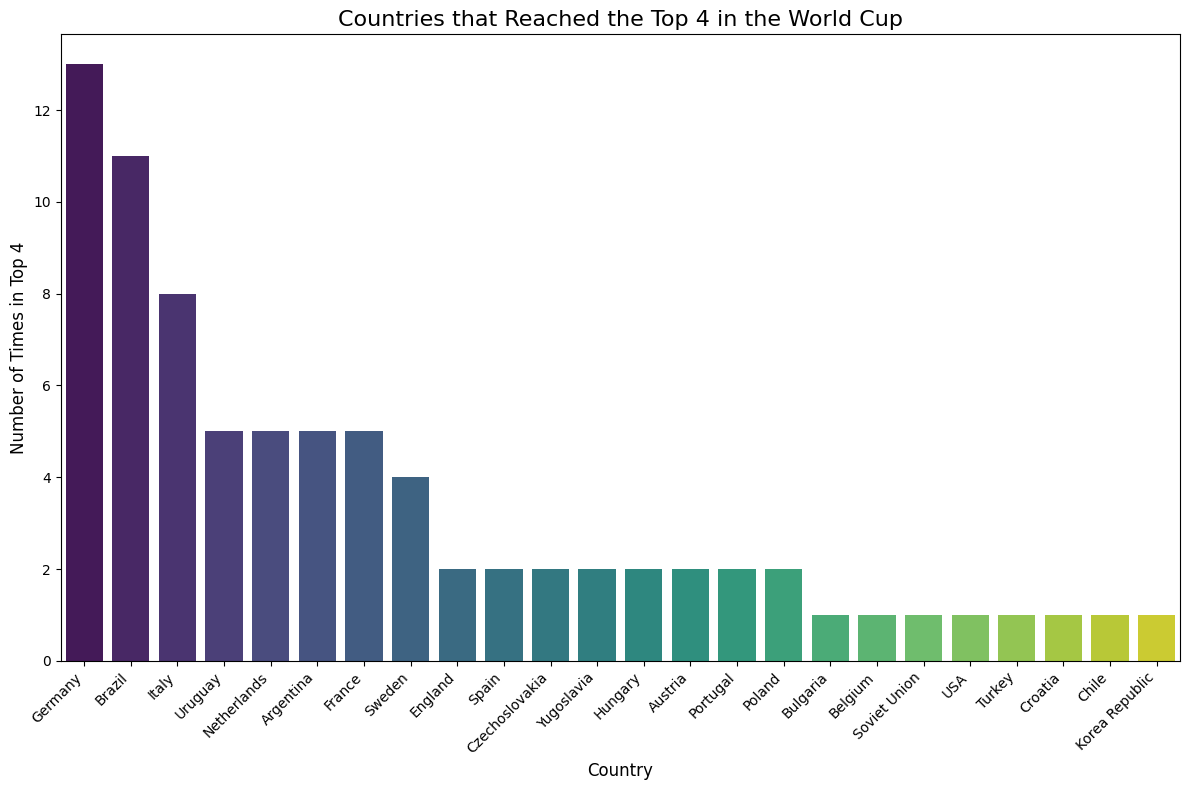

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Top 4', data=top4_counts, palette='viridis', hue='Country', dodge=False, legend=False)

plt.title('Countries that Reached the Top 4 in the World Cup', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Times in Top 4', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### performance por país

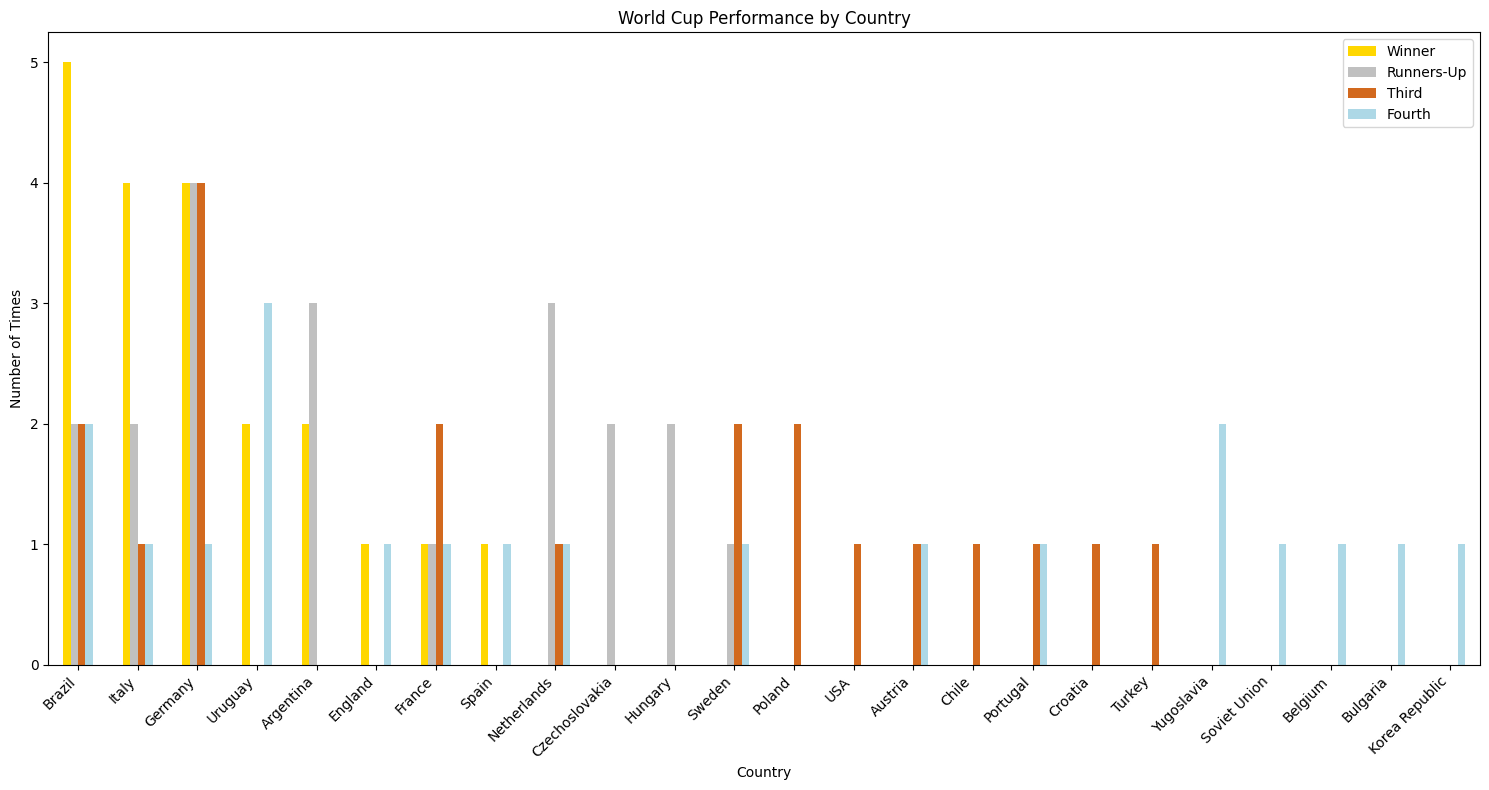

In [ ]:
colors = ['gold', 'silver', 'chocolate', 'lightblue']
teams.plot(kind='bar', figsize=(15, 8), color=colors)
plt.title('World Cup Performance by Country')
plt.xlabel('Country')
plt.ylabel('Number of Times')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### preparação Gephi

In [ ]:
df_world_cup.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [ ]:
df_world_cup[['Winner', 'Runners-Up', 'Third', 'Fourth']]

,Winner,Runners-Up,Third,Fourth
0,Uruguay,Argentina,USA,Yugoslavia
1,Italy,Czechoslovakia,Germany,Austria
2,Italy,Hungary,Brazil,Sweden
3,Uruguay,Brazil,Sweden,Spain
4,Germany,Hungary,Austria,Uruguay
5,Brazil,Sweden,France,Germany
6,Brazil,Czechoslovakia,Chile,Yugoslavia
7,England,Germany,Portugal,Soviet Union
8,Brazil,Italy,Germany,Uruguay
9,Germany,Netherlands,Poland,Brazil


In [ ]:
podium_teams = pd.concat([df_world_cup['Winner'], df_world_cup['Runners-Up'], df_world_cup['Third'], df_world_cup['Fourth']]).unique().tolist()

print(podium_teams)
len(podium_teams)

['Uruguay', 'Italy', 'Germany', 'Brazil', 'England', 'Argentina', 'France', 'Spain', 'Czechoslovakia', 'Hungary', 'Sweden', 'Netherlands', 'USA', 'Austria', 'Chile', 'Portugal', 'Poland', 'Croatia', 'Turkey', 'Yugoslavia', 'Soviet Union', 'Belgium', 'Bulgaria', 'Korea Republic']


24

In [ ]:
df_teams = pd.DataFrame(podium_teams, columns=['Label'])
df_teams['Id'] = range(1, len(df_teams) + 1)
df_teams.to_csv('teams.csv', index=False)
df_teams.tail()

,Label,Id
19,Yugoslavia,20
20,Soviet Union,21
21,Belgium,22
22,Bulgaria,23
23,Korea Republic,24


In [ ]:
team_id_map = {row['Label']: row['Id'] for index, row in df_teams.iterrows()}

edges = []

def add_edge(team1, team2, type, weight):
    edges.append((team1, team2, type, weight))

for i, row in df_world_cup.iterrows():
    winner = row['Winner']
    runners_up = row['Runners-Up']
    third = row['Third']
    fourth = row['Fourth']

    add_edge(team_id_map[winner], team_id_map[runners_up], 'undirected', 100)
    add_edge(team_id_map[runners_up], team_id_map[third], 'undirected', 90)
    add_edge(team_id_map[third], team_id_map[fourth], 'undirected', 80)
    add_edge(team_id_map[winner], team_id_map[third], 'undirected', 70)
    add_edge(team_id_map[runners_up], team_id_map[fourth], 'undirected', 65)
    add_edge(team_id_map[winner], team_id_map[fourth], 'undirected', 60)


df_edges = pd.DataFrame(edges, columns=['Source', 'Target', 'Type', 'Weight'])
df_edges.to_csv('edges2.csv', index=False)
df_edges.tail()

,Source,Target,Type,Weight
115,6,12,undirected,90
116,12,4,undirected,80
117,3,12,undirected,70
118,6,4,undirected,65
119,3,4,undirected,60


## estatisticas edicoes



In [ ]:
df_world_cup['Attendance'].describe()

,Attendance
count,20
unique,20
top,590.549
freq,1


In [ ]:
df_world_cup['Attendance'] = df_world_cup['Attendance'].str.replace('.', '', regex=False).astype(int)
df_world_cup['Attendance'].describe()

,Attendance
count,20
mean,"1,872,882"
std,"1,071,842"
min,"363,000"
25%,"874,832"
50%,"1,734,864"
75%,"2,725,173"
max,"3,587,538"


In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
df_world_cup['Attendance'].describe()

,Attendance
count,20
mean,"1,872,882"
std,"1,071,842"
min,"363,000"
25%,"874,832"
50%,"1,734,864"
75%,"2,725,173"
max,"3,587,538"


In [ ]:
df_world_cup['GoalsScored'].describe()

,GoalsScored
count,20
mean,119
std,33
min,70
25%,89
50%,120
75%,145
max,171


### publico por edicao

Text(0.5, 1.0, 'Attendance Per Year')

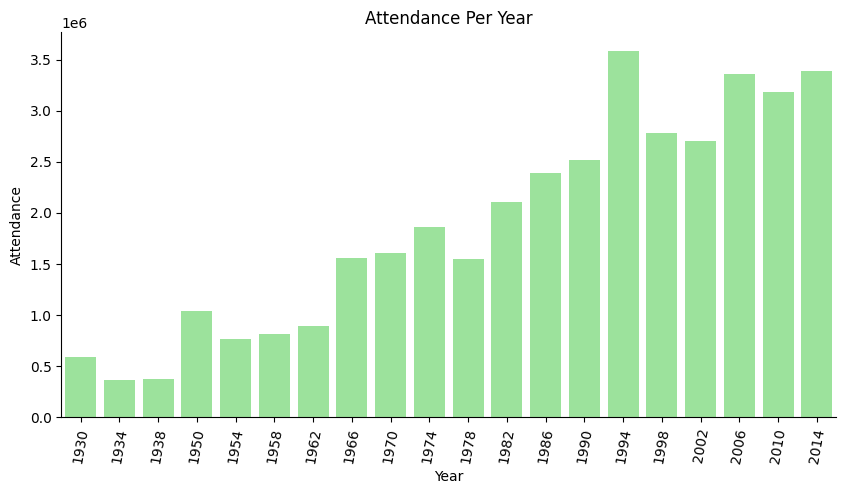

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Attendance Per Year')

### times qualificados por edicao

In [ ]:
df_world_cup['QualifiedTeams'].describe()

,QualifiedTeams
count,20
mean,21
std,7
min,13
25%,16
50%,16
75%,26
max,32


Text(0.5, 1.0, 'Qualified Teams Per Year')

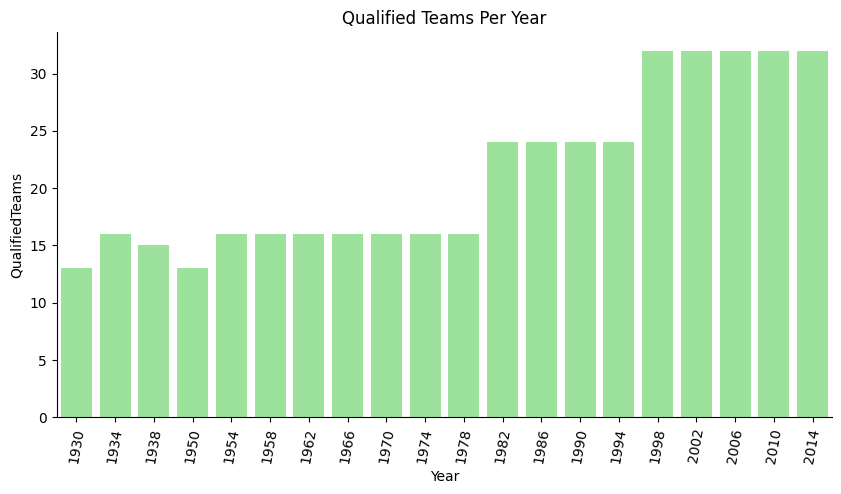

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Qualified Teams Per Year')

### gols marcados por edicao

Text(0.5, 1.0, 'Goals Scored by Teams Per Year')

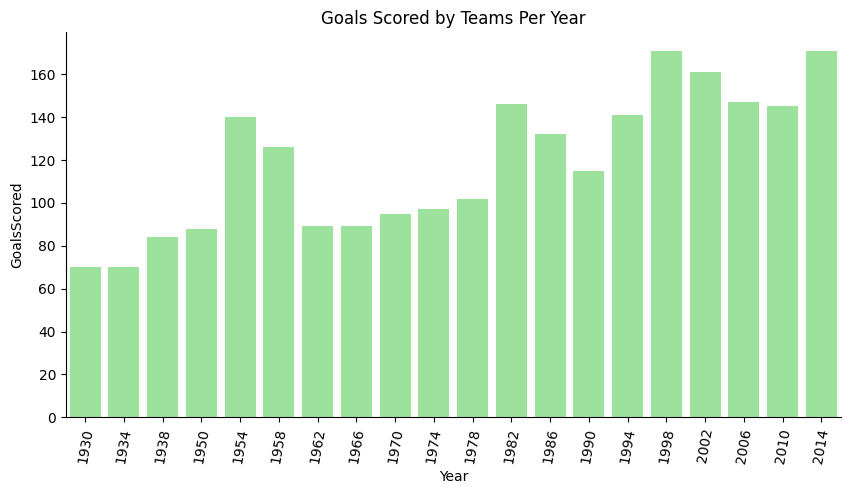

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Goals Scored by Teams Per Year')

### partidas jogadas por edicao

In [ ]:
df_world_cup['MatchesPlayed'].describe()

,MatchesPlayed
count,20
mean,42
std,17
min,17
25%,30
50%,38
75%,55
max,64


Text(0.5, 1.0, 'Matches Played Scored by Teams Per Year')

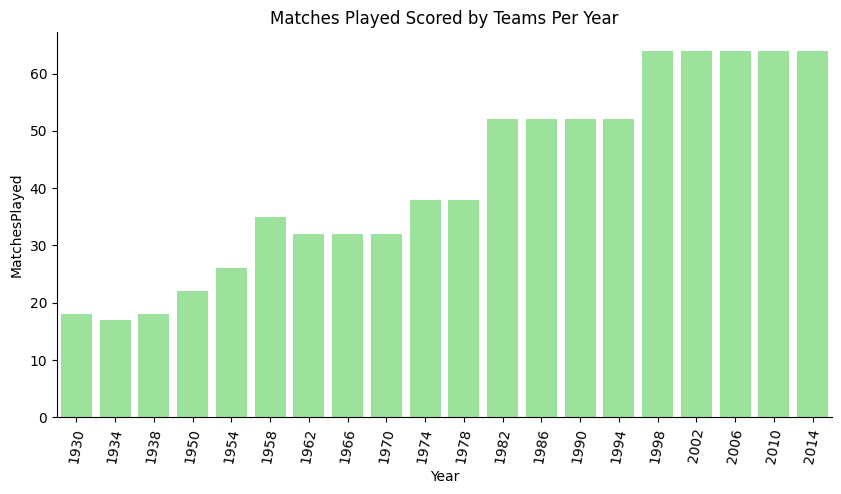

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = df_world_cup, color='lightgreen')
plt.xticks(rotation=80)
g.set_title('Matches Played Scored by Teams Per Year')

## dados gephi

In [ ]:
df_world_cup_gephi = pd.read_csv('/content/drive/My Drive/world-cup-archives/teams_gephi.csv')
df_world_cup_gephi.columns = ['id','label','pageranks','degree','weighted degree','modularity_class','closenesscentrality','betweenesscentrality']
df_world_cup_gephi = df_world_cup_gephi.dropna()

df_world_cup_gephi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24 non-null     int64  
 1   label                 24 non-null     object 
 2   pageranks             24 non-null     float64
 3   degree                24 non-null     int64  
 4   weighted degree       24 non-null     int64  
 5   modularity_class      24 non-null     int64  
 6   closenesscentrality   24 non-null     float64
 7   betweenesscentrality  24 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [ ]:
df_world_cup_gephi.head()

,id,label,pageranks,degree,weighted degree,modularity_class,closenesscentrality,betweenesscentrality
0,1,Uruguay,0,11,1075,0,1,15
1,2,Italy,0,14,1875,1,1,24
2,3,Germany,0,18,3105,1,1,65
3,4,Brazil,0,17,2550,2,1,56
4,5,England,0,5,435,1,1,2


In [ ]:
df_world_cup_gephi['label'].value_counts()

,count
label,
Uruguay,1
Italy,1
Bulgaria,1
Belgium,1
Soviet Union,1
Yugoslavia,1
Turkey,1
Croatia,1
Poland,1


### PageRank

O PageRank mede a importância de um nó (país) com base nas conexões recebidas de outros nós importantes. Países que aparecem com mais frequência nas posições de destaque (como 1º, 2º, 3º, ou 4º lugares) e que se relacionam com outros países que também ocupam posições de destaque terão um PageRank mais alto. Times que, além de vencer, competem com outros países fortes no Top 4, serão considerados mais "importantes" na rede de competições.

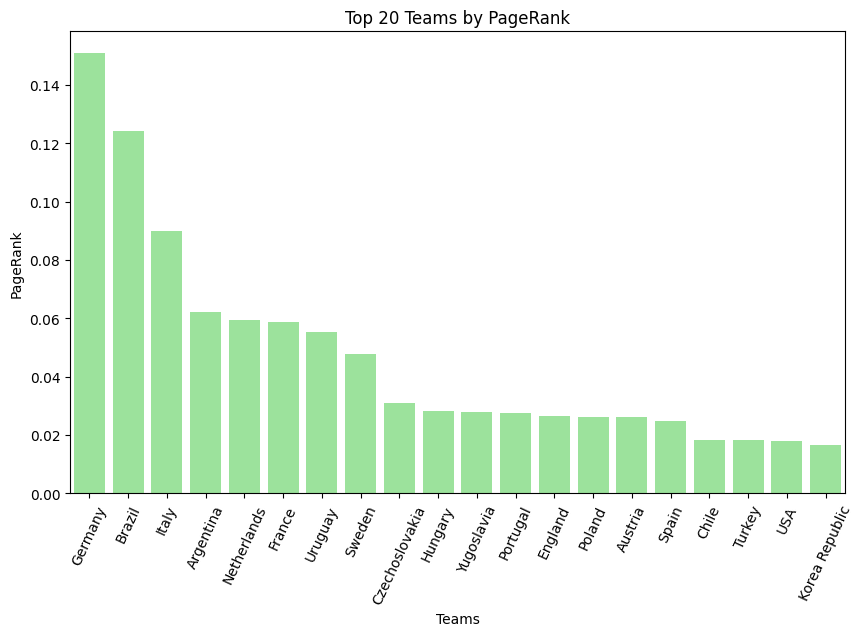

In [ ]:
df_world_cup_gephi = df_world_cup_gephi.sort_values(by='pageranks', ascending=False)
df_pagerank = df_world_cup_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='pageranks', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by PageRank')
plt.xlabel('Teams')
plt.ylabel('PageRank')
plt.xticks(rotation=65)
plt.show()

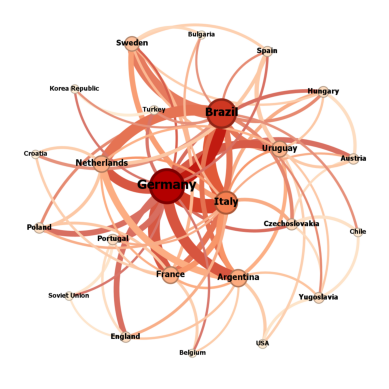

In [ ]:
img = mpimg.imread('/content/drive/My Drive/world-cup-archives/top4_pagerank.png')

plt.imshow(img)
plt.axis('off')
plt.show()

### Degree

Mede o número de conexões diretas que um nó (país) possui com outros nós.
O Degree Centrality representa quantas vezes um país competiu em relação a outros países do Top 4. Quanto maior a centralidade de grau de um país, mais ele apareceu nas semifinais e finais ao longo dos anos, independentemente de sua colocação. Esse valor reflete a quantidade de competições em que ele esteve relacionado diretamente com outros países nas colocações de topo.

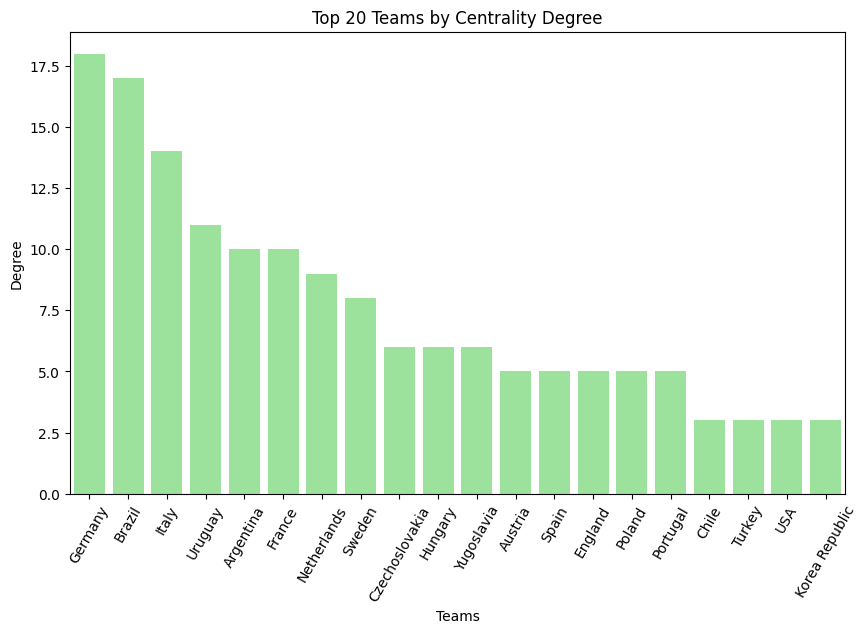

In [ ]:
df_world_cup_gephi = df_world_cup_gephi.sort_values(by='degree', ascending=False)
df_degree = df_world_cup_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='degree', data=df_degree, color='lightgreen')
plt.title('Top 20 Teams by Centrality Degree')
plt.xlabel('Teams')
plt.ylabel('Degree')
plt.xticks(rotation=60)
plt.show()

### Weighted Degree

O grau ponderado leva em consideração os pesos das conexões (arestas), não apenas o número delas. O Weighted Degree mede o número de conexões de um país, levando em consideração o peso das arestas. Países que competiram em colocações mais próximas (1º e 2º, ou 2º e 3º, etc.) terão arestas com pesos maiores, aumentando o Weighted Degree. Se um país frequentemente ocupa as colocações superiores (1º ou 2º lugar) em relação a outros, seu grau ponderado será maior, refletindo a qualidade (não apenas a quantidade) dessas competições em função da proximidade de colocações.

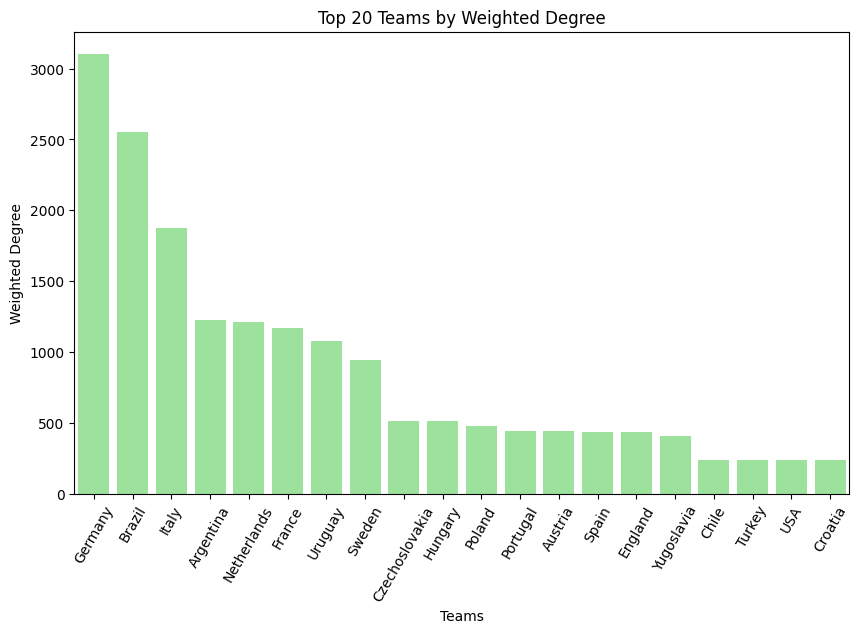

In [ ]:
df_world_cup_gephi = df_world_cup_gephi.sort_values(by='weighted degree', ascending=False)
df_degree = df_world_cup_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='weighted degree', data=df_degree, color='lightgreen')
plt.title('Top 20 Teams by Weighted Degree')
plt.xlabel('Teams')
plt.ylabel('Weighted Degree')
plt.xticks(rotation=60)
plt.show()

# preparação dados - partidas

In [ ]:
df_matches = pd.read_csv('/content/drive/My Drive/world-cup-archives/WorldCupMatches.csv')
df_matches.columns = ['Year','Datetime','Stage','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Win conditions','Attendance','Half-time Home Goals','Half-time Away Goals','Referee','Assistant 1','Assistant 2','RoundID','MatchID','Home Team Initials','Away Team Initials']
df_matches = df_matches.dropna()

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           850 no

In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,"1,930",13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,"4,444",3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,"1,096",FRA,MEX
1,"1,930",13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,"18,346",2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,"1,090",USA,BEL
2,"1,930",14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,"24,059",2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,"1,093",YUG,BRA
3,"1,930",14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,"2,549",1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,"1,098",ROU,PER
4,"1,930",15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,"23,409",0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,"1,085",ARG,FRA


In [ ]:
df_matches.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,"2,014",05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),"51,179",0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),"255,953","300,186,488",NED,CRC
848,"2,014",08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,"58,141",0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),"255,955","300,186,474",BRA,GER
849,"2,014",09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),"63,267",0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),"255,955","300,186,490",NED,ARG
850,"2,014",12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,"68,034",0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),"255,957","300,186,502",BRA,NED
851,"2,014",13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1,0,Argentina,Germany win after extra time,"74,738",0,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),"255,959","300,186,501",GER,ARG


In [ ]:
df_matches['Stage'].value_counts()

,count
Stage,
Round of 16,70
Quarter-finals,66
Group 1,62
Group A,60
Group B,60
Group 2,59
Group 3,56
Group 4,55
Group C,48


In [ ]:
df_matches = df_matches.replace('Match for third place', 'Third place')
df_matches = df_matches.replace('Play-off for third place', 'Third place')
df_matches = df_matches.replace('Preliminary round', 'Round of 16')
df_matches = df_matches.replace('First round', 'Round of 16')
df_matches = df_matches.replace('Group 1', 'Groups')
df_matches = df_matches.replace('Group 2', 'Groups')
df_matches = df_matches.replace('Group 3', 'Groups')
df_matches = df_matches.replace('Group 4', 'Groups')
df_matches = df_matches.replace('Group 5', 'Groups')
df_matches = df_matches.replace('Group 6', 'Groups')
df_matches = df_matches.replace('Group A', 'Groups')
df_matches = df_matches.replace('Group B', 'Groups')
df_matches = df_matches.replace('Group C', 'Groups')
df_matches = df_matches.replace('Group D', 'Groups')
df_matches = df_matches.replace('Group E', 'Groups')
df_matches = df_matches.replace('Group F', 'Groups')
df_matches = df_matches.replace('Group G', 'Groups')
df_matches = df_matches.replace('Group H', 'Groups')

df_matches['Stage'].value_counts()

,count
Stage,
Groups,622
Round of 16,87
Quarter-finals,66
Semi-finals,36
Final,20
Third place,19


In [ ]:
df_matches[df_matches['Year'] == 1934].head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
18,"1,934",27 May 1934 - 16:30,Round of 16,Stadio Benito Mussolini,Turin,Austria,3,2,France,Austria win after extra time,"16,000",0,0,VAN MOORSEL Johannes (NED),CAIRONI Camillo (ITA),BAERT Louis (BEL),204,"1,104",AUT,FRA
19,"1,934",27 May 1934 - 16:30,Round of 16,Giorgio Ascarelli,Naples,Hungary,4,2,Egypt,,"9,000",2,2,BARLASSINA Rinaldo (ITA),DATTILO Generoso (ITA),SASSI Otello (ITA),204,"1,119",HUN,EGY
20,"1,934",27 May 1934 - 16:30,Round of 16,San Siro,Milan,Switzerland,3,2,Netherlands,,"33,000",2,1,EKLIND Ivan (SWE),BERANEK Alois (AUT),BONIVENTO Ferruccio (ITA),204,"1,133",SUI,NED
21,"1,934",27 May 1934 - 16:30,Round of 16,Littorale,Bologna,Sweden,3,2,Argentina,,"14,000",1,1,BRAUN Eugen (AUT),CARRARO Albino (ITA),TURBIANI Giuseppe (ITA),204,"1,102",SWE,ARG
22,"1,934",27 May 1934 - 16:30,Round of 16,Giovanni Berta,Florence,Germany,5,2,Belgium,,"8,000",1,2,MATTEA Francesco (ITA),MELANDRI Ermenegildo (ITA),BAERT Jacques (FRA),204,"1,108",GER,BEL


In [ ]:
df_matches['Home Team Name'].value_counts()

,count
Home Team Name,
Brazil,82
Italy,57
Argentina,54
Germany FR,43
England,35
...,...
Wales,1
Norway,1
"rn"">United Arab Emirates",1


In [ ]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,
"rn"">Republic of Ireland",5
"rn"">United Arab Emirates",1
"rn"">Trinidad and Tobago",1
"rn"">Serbia and Montenegro",1
"rn"">Bosnia and Herzegovina",1


In [ ]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Trinidad and Tobago',
 'rn">Serbia and Montenegro',
 'rn">Bosnia and Herzegovina']

In [ ]:
correct = [name.split('>')[1] for name in wrong]
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Trinidad and Tobago',
 'Serbia and Montenegro',
 'Bosnia and Herzegovina']

In [ ]:
for index, wr in enumerate(wrong):
  df_matches = df_matches.replace(wrong[index], correct[index])

In [ ]:
names = df_matches[df_matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

,count
Home Team Name,


In [ ]:
names = df_matches[df_matches['Stadium'].str.contains('�')]['Stadium'].value_counts()
names

,count
Stadium,
Nou Camp - Estadio Le�n,11
Stade V�lodrome,9
Maracan� - Est�dio Jornalista M�rio Filho,8
Estadio Ol�mpico Chateau Carreras,8
Estadio Jos� Mar�a Minella,6
Estadio Ol�mpico Universitario,4
Estadio Municipal de Bala�dos,3


In [ ]:
wrong = list(names.index)
wrong

['Nou Camp - Estadio Le�n',
 'Stade V�lodrome',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio Ol�mpico Chateau Carreras',
 'Estadio Jos� Mar�a Minella',
 'Estadio Ol�mpico Universitario',
 'Estadio Municipal de Bala�dos']

In [ ]:
correct = ['Nou Camp - Estadio Leon',
 'Stade Velodrome',
 'Maracana - Estadio Jornalista Mario Filho',
 'Estadio Olimpico Chateau Carreras',
 'Estadio Jose Maria Minella',
 'Estadio Olimpico Universitario',
 'Estadio Municipal de Balaidos']
correct

['Nou Camp - Estadio Leon',
 'Stade Velodrome',
 'Maracana - Estadio Jornalista Mario Filho',
 'Estadio Olimpico Chateau Carreras',
 'Estadio Jose Maria Minella',
 'Estadio Olimpico Universitario',
 'Estadio Municipal de Balaidos']

In [ ]:
for index, wr in enumerate(wrong):
  df_matches = df_matches.replace(wrong[index], correct[index])

In [ ]:
names = df_matches[df_matches['Stadium'].str.contains('�')]['Stadium'].value_counts()
names

,count
Stadium,


In [ ]:
df_matches['Home Team Name'] = df_matches['Home Team Name'].replace('Germany FR', 'Germany')
df_matches['Home Team Name'] = df_matches['Home Team Name'].replace('German DR', 'Germany')
df_matches['Home Team Name'] = df_matches['Home Team Name'].replace('IR Iran', 'Iran')
df_matches['Away Team Name'] = df_matches['Away Team Name'].replace('Germany FR', 'Germany')
df_matches['Away Team Name'] = df_matches['Away Team Name'].replace('German DR', 'Germany')
df_matches['Away Team Name'] = df_matches['Away Team Name'].replace('IR Iran', 'Iran')
df_matches['Home Team Initials'] = df_matches['Home Team Initials'].replace('FRG', 'GER')
df_matches['Home Team Initials'] = df_matches['Home Team Initials'].replace('GDR', 'GER')
df_matches['Away Team Initials'] = df_matches['Away Team Initials'].replace('FRG', 'GER')
df_matches['Away Team Initials'] = df_matches['Away Team Initials'].replace('GDR', 'GER')
df_matches['Home Team Name'].value_counts()

,count
Home Team Name,
Brazil,82
Germany,78
Italy,57
Argentina,54
England,35
...,...
China PR,1
Canada,1
Jamaica,1


In [ ]:
df_matches[df_matches['Home Team Name'] == 'German DR']

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials


## frequencia de publico

In [ ]:
df_matches['Attendance'].describe()

,Attendance
count,850
mean,"45,165"
std,"23,485"
min,"2,000"
25%,"30,000"
50%,"41,580"
75%,"61,374"
max,"173,850"


In [ ]:
np.histogram(df_matches['Attendance'])

(array([114, 215, 241, 166,  76,  25,   9,   1,   2,   1]),
 array([  2000.,  19185.,  36370.,  53555.,  70740.,  87925., 105110.,
        122295., 139480., 156665., 173850.]))

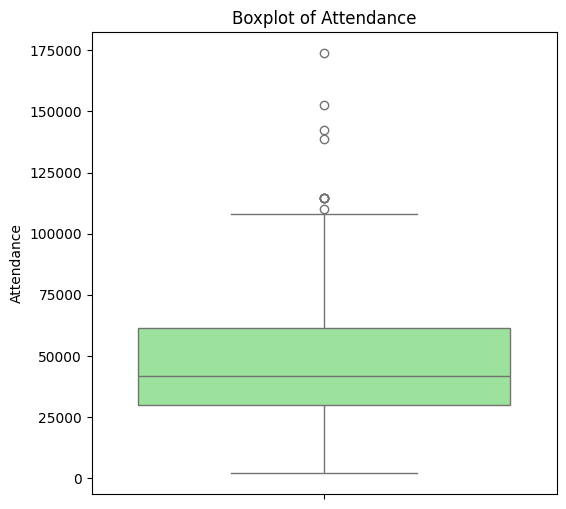

In [ ]:
# prompt: gere um boxplot de attendance vertical

plt.figure(figsize=(6, 6))
sns.boxplot(y='Attendance', data=df_matches, color='lightgreen')
plt.title('Boxplot of Attendance')
plt.ylabel('Attendance')
plt.show()


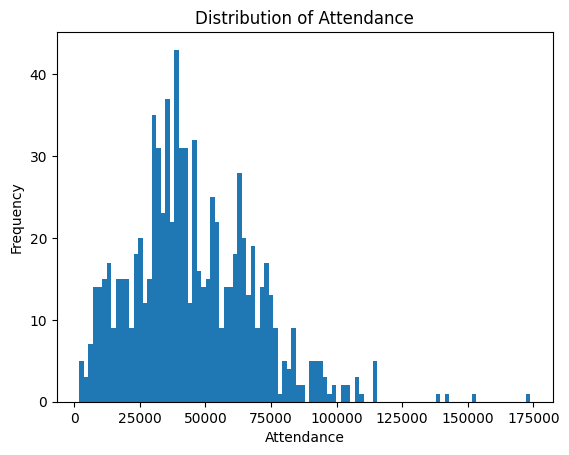

In [ ]:
plt.hist(df_matches['Attendance'], bins=100)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.title('Distribution of Attendance')
plt.show()

## nuvem de palavras times com mais vitorias

In [ ]:
winner_by_score_home = df_matches['Home Team Goals'] > df_matches['Away Team Goals']
winner_by_score_away = df_matches['Home Team Goals'] < df_matches['Away Team Goals']
win_by_score = winner_by_score_home | winner_by_score_away
win_penalties = df_matches['Win conditions'].str.len() > 1

win_team_home = np.where(winner_by_score_home, df_matches['Home Team Name'], '')
win_team_away = np.where(winner_by_score_away, df_matches['Away Team Name'], '')

win_cond = df_matches['Win conditions'].str.split(pat='\(|\)|-', expand=True)
win_team_penalties = np.where(win_cond[0].str.len() > 1,
                     np.where(win_cond[1] > win_cond[2],
                              df_matches['Home Team Name'], df_matches['Away Team Name']), '')

win_team = np.where(win_team_home != '', win_team_home,
                    np.where(win_team_away != '', win_team_away, win_team_penalties))

df_matches.loc[:,'result'] = np.where(win_by_score, 'win', np.where(win_penalties, 'win', 'draw'))
df_matches.loc[:,'Winner'] = win_team
df_matches.loc[:,'Looser'] = np.where(df_matches['result'] != 'draw',
                                        np.where(win_team == df_matches['Home Team Name'],
                                                 df_matches['Away Team Name'],
                                                 df_matches['Home Team Name']), '')

In [ ]:
df_matches['Winner']

,Winner
0,France
1,USA
2,Yugoslavia
3,Romania
4,Argentina
...,...
847,Netherlands
848,Germany
849,Netherlands
850,Netherlands


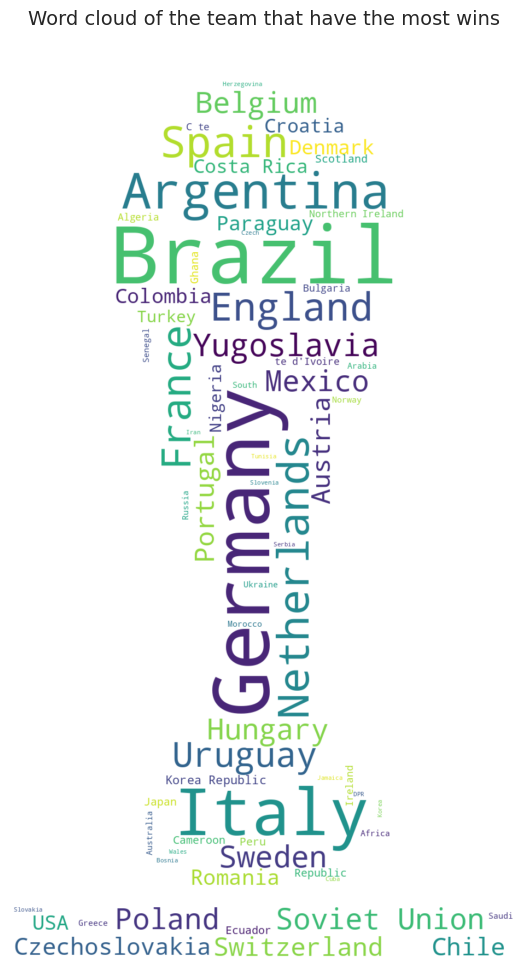

In [ ]:
# cup_mask = np.array(Image.open("./fifa-world-cup-thropy.jpg"))
cup_mask = np.array(Image.open('/content/drive/My Drive/world-cup-archives/fifa-world-cup-thropy.jpg'))

wc_cup = WordCloud(background_color="white", max_words=2000, mask=cup_mask)

winner_text = ' '.join(df_matches['Winner'].dropna().tolist())

wc_cup.generate(winner_text)

plt.figure(figsize = (21,12))
sns.set_style("whitegrid")

plt.title('Word cloud of the team that have the most wins', fontsize=14)
plt.imshow(wc_cup, interpolation='bilinear')
plt.axis("off")

plt.show()

## times com mais gols totais

In [ ]:
home = df_matches[['Home Team Name', 'Home Team Goals']].dropna()
away = df_matches[['Away Team Name', 'Away Team Goals']].dropna()

In [ ]:
home.columns = ['Countries', 'Goals']
away.columns = home.columns

In [ ]:
goals = pd.concat([home, away], ignore_index=True)

In [ ]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12
Angola,1
Argentina,133
Australia,11
Austria,43
...,...
United Arab Emirates,2
Uruguay,80
Wales,4


In [ ]:
goals = goals.sort_values(by = 'Goals', ascending=False)
goals

,Goals
Countries,
Germany,236
Brazil,225
Argentina,133
Italy,128
France,108
...,...
Canada,0
China PR,0
Trinidad and Tobago,0


In [ ]:
home_team_goals = df_matches.groupby('Home Team Name')['Home Team Goals'].sum().reset_index()
away_team_goals = df_matches.groupby('Away Team Name')['Away Team Goals'].sum().reset_index()
home_team_goals.columns = ['Team', 'Goals']
away_team_goals.columns = ['Team', 'Goals']
team_goals = pd.concat([home_team_goals, away_team_goals]).groupby('Team')['Goals'].sum().reset_index()
top_20_teams = team_goals.sort_values(by='Goals', ascending=False).head(20)

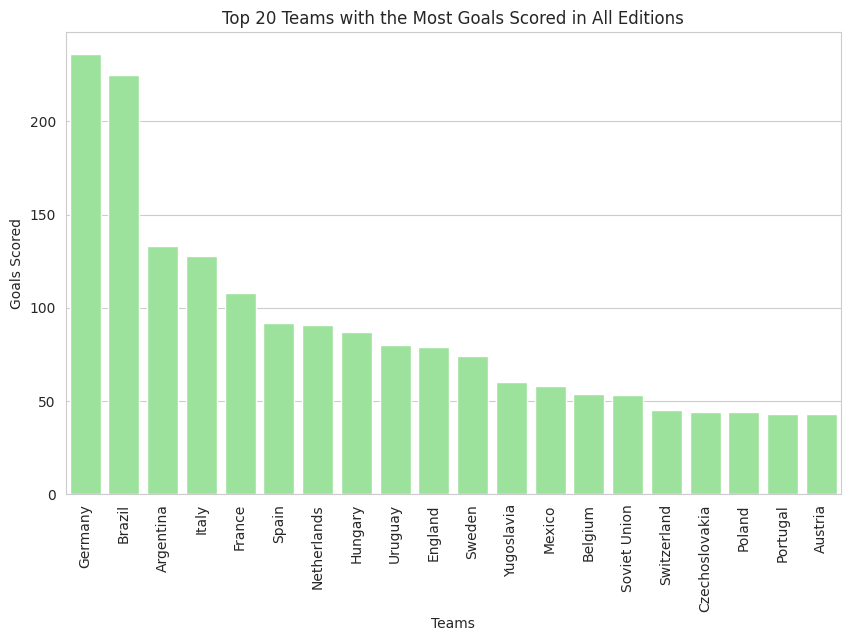

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Team', y='Goals', data=top_20_teams, color='lightgreen')
plt.title('Top 20 Teams with the Most Goals Scored in All Editions')
plt.xlabel('Teams')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.show()


## mais gols por edicao

In [ ]:
home = df_matches.groupby(['Year', 'Home Team Name'])['Home Team Goals'].sum()
home

Year   Home Team Name
1,930  Argentina        16
       Brazil            4
       Chile             4
       France            4
       Paraguay          1
                        ..
2,014  Russia            1
       Spain             1
       Switzerland       4
       USA               2
       Uruguay           3
Name: Home Team Goals, Length: 365, dtype: float64

In [ ]:
away = df_matches.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

NameError: name 'df_matches' is not defined

In [ ]:
goals = pd.concat([home, away], axis=1)
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
Year                  
1,930 Argentina     18
      Brazil         5
      Chile          5
      France         4
      Paraguay       1
...                ...
1,998 Denmark        9
      Iran           2
      Mexico         8
      Norway         5
      Tunisia        1

[424 rows x 1 columns]

In [ ]:
goals = goals.reset_index()

In [ ]:
goals

,Year,level_1,Goals
0,"1,930",Argentina,18
1,"1,930",Brazil,5
2,"1,930",Chile,5
3,"1,930",France,4
4,"1,930",Paraguay,1
...,...,...,...
419,"1,998",Denmark,9
420,"1,998",Iran,2
421,"1,998",Mexico,8
422,"1,998",Norway,5


In [ ]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,"1,930",Argentina,18
7,"1,930",Uruguay,15
6,"1,930",USA,7
8,"1,930",Yugoslavia,7
1,"1,930",Brazil,5
...,...,...,...
354,"2,014",Japan,2
360,"2,014",Russia,2
339,"2,014",Cameroon,1
351,"2,014",Honduras,1


In [ ]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,"1,930",Argentina,18
7,"1,930",Uruguay,15
6,"1,930",USA,7
8,"1,930",Yugoslavia,7
1,"1,930",Brazil,5
13,"1,934",Italy,12
11,"1,934",Germany,11
10,"1,934",Czechoslovakia,9
9,"1,934",Austria,7
12,"1,934",Hungary,5


In [ ]:
x, y = goals['Year'].values, goals['Goals'].values
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']

    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = True)

fig = go.Figure(data = data, layout = layout)
fig.show()

## partidas com maior numero de publico

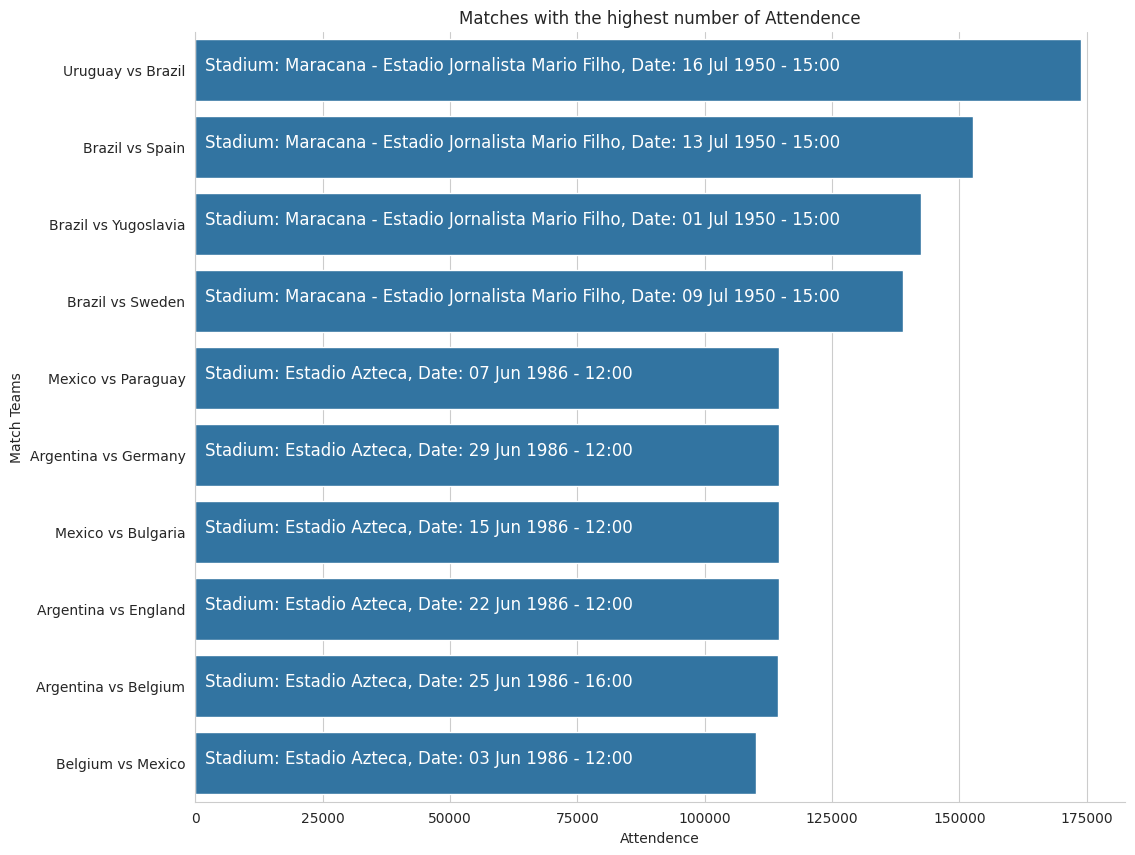

In [ ]:
top10 = df_matches.sort_values(by = 'Attendance', ascending = False)[:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'white')
plt.show()

## estadios com maior media de publico

In [ ]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index()
std_sorted = std.sort_values(by='Attendance', ascending=False)
top_stadiums = std_sorted.head(10)
top_stadiums

,Stadium,City,Attendance
99,Maracana - Estadio Jornalista Mario Filho,Rio De Janeiro,"101,693"
32,Estadio Azteca,Mexico City,"100,924"
137,Rose Bowl,Los Angeles,"92,601"
179,Wembley Stadium,London,"86,448"
151,Soccer City Stadium,Johannesburg,"83,857"
146,Santiago Bernabeu,Madrid,"82,522"
167,Stanford Stadium,San Francisco,"81,737"
159,Stade de France,Saint-Denis,"78,222"
48,Estadio do Maracana,Rio De Janeiro,"74,197"
64,Giants Stadium,New York/New Jersey,"73,690"


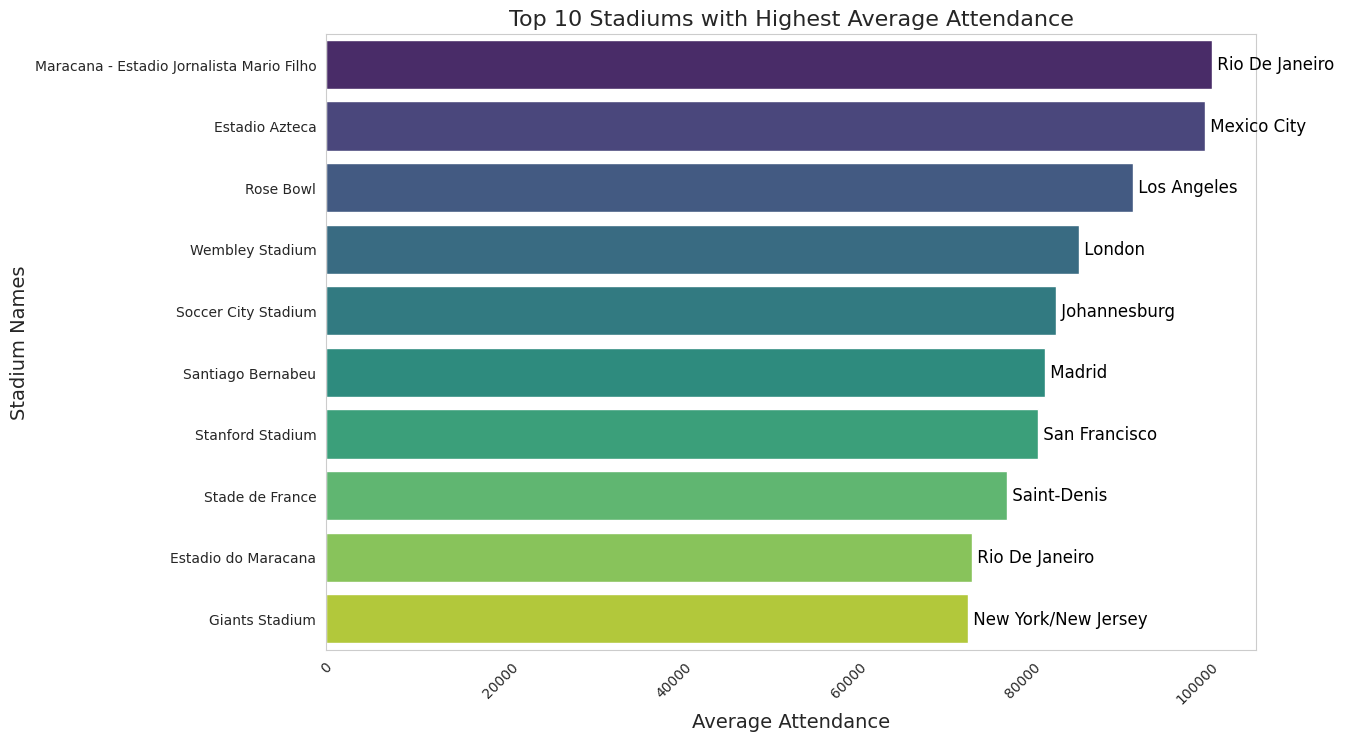

In [ ]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)
top_stadiums = std[:10]
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_stadiums['Stadium'], x=top_stadiums['Attendance'], hue=top_stadiums['Stadium'], palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Stadiums with Highest Average Attendance', fontsize=16)
plt.xlabel('Average Attendance', fontsize=14)
plt.ylabel('Stadium Names', fontsize=14)
plt.xticks(rotation=45)

for i, (attendance, city) in enumerate(zip(top_stadiums['Attendance'], top_stadiums['City'])):
    ax.text(attendance, i, f' {city}', color='black', va='center', fontsize=12)

plt.grid(axis='x')
plt.show()

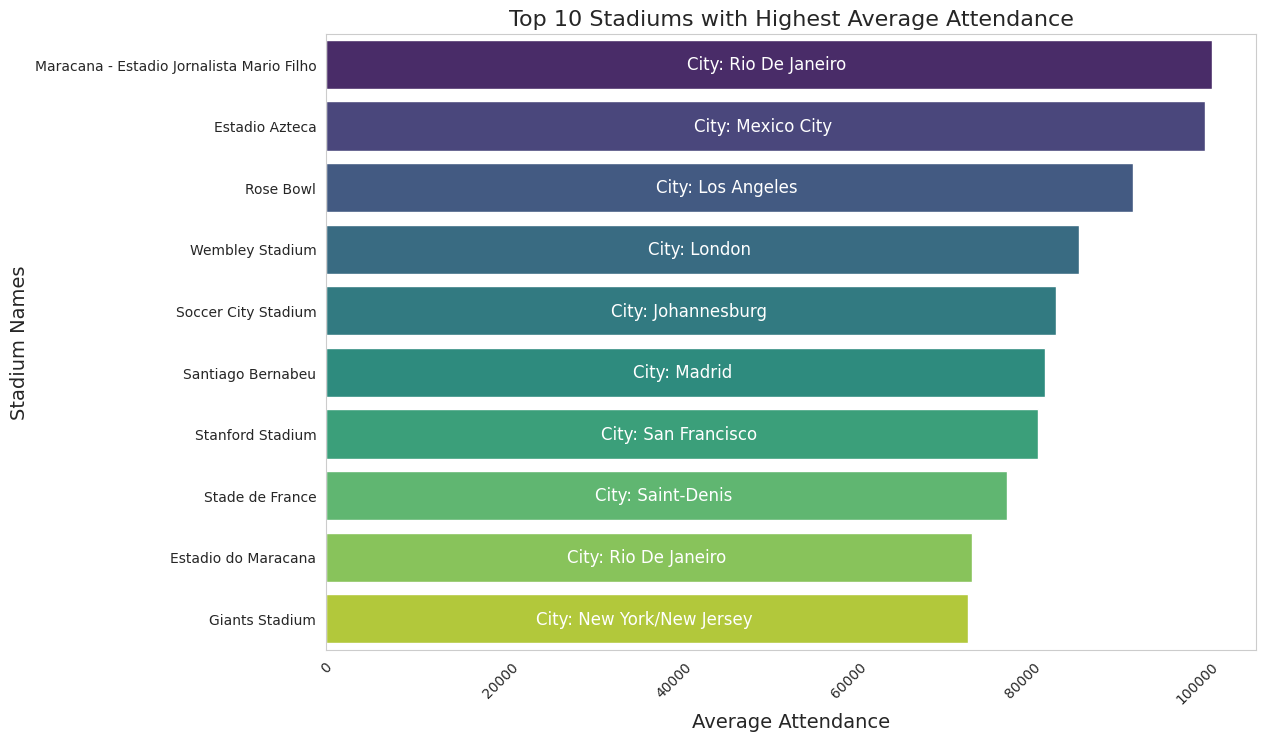

In [ ]:
df_matches['Year'] = df_matches['Year'].astype(int)
std = df_matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by='Attendance', ascending=False)
top_stadiums = std[:10]
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_stadiums['Stadium'], x=top_stadiums['Attendance'], hue=top_stadiums['Stadium'], dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Stadiums with Highest Average Attendance', fontsize=16)
plt.xlabel('Average Attendance', fontsize=14)
plt.ylabel('Stadium Names', fontsize=14)
plt.xticks(rotation=45)

for i, (attendance, city) in enumerate(zip(top_stadiums['Attendance'], top_stadiums['City'])):
    ax.text(attendance * 0.5, i, f'City: {city}', color='white', ha='center', va='center', fontsize=12)  # Ajuste aqui

plt.grid(axis='x')

plt.show()

## dados gephi

In [ ]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,result,Winner,Looser
0,1930,13 Jul 1930 - 15:00,Groups,Pocitos,Montevideo,France,4,1,Mexico,,...,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,"1,096",FRA,MEX,win,France,Mexico
1,1930,13 Jul 1930 - 15:00,Groups,Parque Central,Montevideo,USA,3,0,Belgium,,...,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,"1,090",USA,BEL,win,USA,Belgium
2,1930,14 Jul 1930 - 12:45,Groups,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,"1,093",YUG,BRA,win,Yugoslavia,Brazil
3,1930,14 Jul 1930 - 14:50,Groups,Pocitos,Montevideo,Romania,3,1,Peru,,...,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,"1,098",ROU,PER,win,Romania,Peru
4,1930,15 Jul 1930 - 16:00,Groups,Parque Central,Montevideo,Argentina,1,0,France,,...,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,"1,085",ARG,FRA,win,Argentina,France


In [ ]:
df_matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name','Winner','Looser']]

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner,Looser
0,France,4,1,Mexico,France,Mexico
1,USA,3,0,Belgium,USA,Belgium
2,Yugoslavia,2,1,Brazil,Yugoslavia,Brazil
3,Romania,3,1,Peru,Romania,Peru
4,Argentina,1,0,France,Argentina,France
...,...,...,...,...,...,...
847,Netherlands,0,0,Costa Rica,Netherlands,Costa Rica
848,Brazil,1,7,Germany,Germany,Brazil
849,Netherlands,0,0,Argentina,Netherlands,Argentina
850,Brazil,0,3,Netherlands,Netherlands,Brazil


In [ ]:
matches_teams = pd.concat([
    df_matches['Winner'].dropna().str.strip().replace('', pd.NA),
    df_matches['Looser'].dropna().str.strip().replace('', pd.NA)
]).dropna().unique().tolist()

matches_teams = [team.replace("C�te d'Ivoire", "Cote d'Ivoire") for team in matches_teams]
matches_teams = [team for team in matches_teams if team]
print(matches_teams)
len(matches_teams)

['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile', 'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary', 'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy', 'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Northern Ireland', 'Soviet Union', 'Wales', 'Mexico', 'Portugal', 'Korea DPR', 'Peru', 'Belgium', 'Scotland', 'Netherlands', 'Poland', 'Tunisia', 'Algeria', 'Denmark', 'Morocco', 'Cameroon', 'Colombia', 'Costa Rica', 'Republic of Ireland', 'Norway', 'Nigeria', 'Saudi Arabia', 'Bulgaria', 'Russia', 'Croatia', 'Iran', 'Jamaica', 'Senegal', 'Korea Republic', 'South Africa', 'Japan', 'Ecuador', 'Australia', 'Czech Republic', 'Ghana', 'Ukraine', "Cote d'Ivoire", 'Slovenia', 'Greece', 'Serbia', 'Slovakia', 'Bosnia and Herzegovina', 'Bolivia', 'Egypt', 'Dutch East Indies', 'Israel', 'El Salvador', 'Zaire', 'Haiti', 'New Zealand', 'Kuwait', 'Honduras', 'Canada', 'Iraq', 'United Arab Emirates', 'China PR', 'Serbia and Montenegro', 'Angola', 'Togo', 'Trinidad and Tobago']


80

In [ ]:
matches_teams = pd.DataFrame(matches_teams, columns=['label'])
matches_teams['id'] = range(1, len(matches_teams) + 1)
matches_teams.to_csv('matches_teams.csv', index=False)
matches_teams

,label,id
0,France,1
1,USA,2
2,Yugoslavia,3
3,Romania,4
4,Argentina,5
...,...,...
75,China PR,76
76,Serbia and Montenegro,77
77,Angola,78
78,Togo,79


In [ ]:
team_id_map = {row['label']: row['id'] for index, row in matches_teams.iterrows()}

edges = []

for i, row in df_matches.iterrows():
    winner = row['Winner']
    looser = row['Looser']
    if winner in team_id_map and looser in team_id_map:
        edges.append((team_id_map[looser], team_id_map[winner]))

df_edges = pd.DataFrame(edges, columns=['source', 'target'])
df_edges_weighted = df_edges.value_counts().reset_index(name='weight')
df_edges_weighted.columns = ['source', 'target', 'weight']
df_edges_weighted['type'] = 'directed'
df_edges_weighted = df_edges_weighted[(df_edges_weighted['source'] != '') & (df_edges_weighted['target'] != '')]
df_edges_weighted = df_edges_weighted[['source', 'target', 'type', 'weight']]
df_edges_weighted.to_csv('edges_weighted2.csv', index=False)
df_edges_weighted

,source,target,type,weight
0,5,14,directed,6
1,13,8,directed,5
2,6,8,directed,5
3,10,16,directed,4
4,41,5,directed,4
...,...,...,...,...
518,16,49,directed,1
519,16,45,directed,1
520,16,39,directed,1
521,16,38,directed,1


In [ ]:
df_edges_weighted.head()

,source,target,type,weight
0,5,14,directed,6
1,13,8,directed,5
2,6,8,directed,5
3,10,16,directed,4
4,41,5,directed,4


### dados gephi

In [ ]:
df_matches_gephi = pd.read_csv('/content/drive/My Drive/world-cup-archives/teams_matches_gephi.csv')
df_matches_gephi.columns = ['id','label','indegree','outdegree','degree','weighted indegree','weighted outdegree','weighted degree','closenesscentrality','betweenesscentrality','Authority','Hub','pageranks']
df_matches_gephi = df_matches_gephi.dropna()

df_matches_gephi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    80 non-null     int64  
 1   label                 80 non-null     object 
 2   indegree              80 non-null     int64  
 3   outdegree             80 non-null     int64  
 4   degree                80 non-null     int64  
 5   weighted indegree     80 non-null     int64  
 6   weighted outdegree    80 non-null     int64  
 7   weighted degree       80 non-null     int64  
 8   closenesscentrality   80 non-null     float64
 9   betweenesscentrality  80 non-null     float64
 10  Authority             80 non-null     float64
 11  Hub                   80 non-null     float64
 12  pageranks             80 non-null     float64
dtypes: float64(5), int64(7), object(1)
memory usage: 8.2+ KB


### In-degree

O Indegree representa quantas vezes um time venceu outro. Quanto maior o in-degree de um time, mais vezes ele foi o vencedor de jogos na rede.


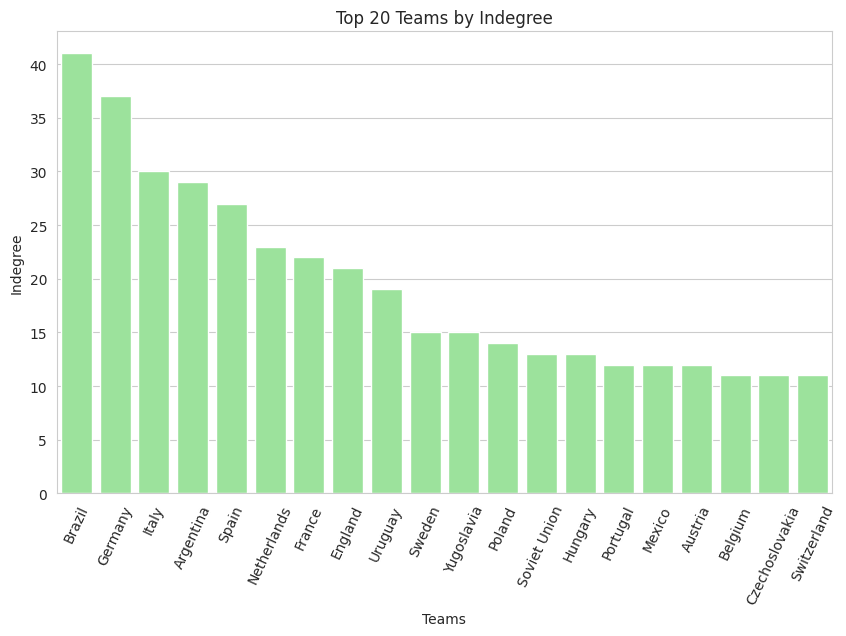

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='indegree', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='indegree', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Indegree')
plt.xlabel('Teams')
plt.ylabel('Indegree')
plt.xticks(rotation=65)
plt.show()

### Out-degree

O Out-degree representa quantas vezes um time perdeu para outro. Times com alto out-degree são aqueles que perderam muitas vezes na rede.

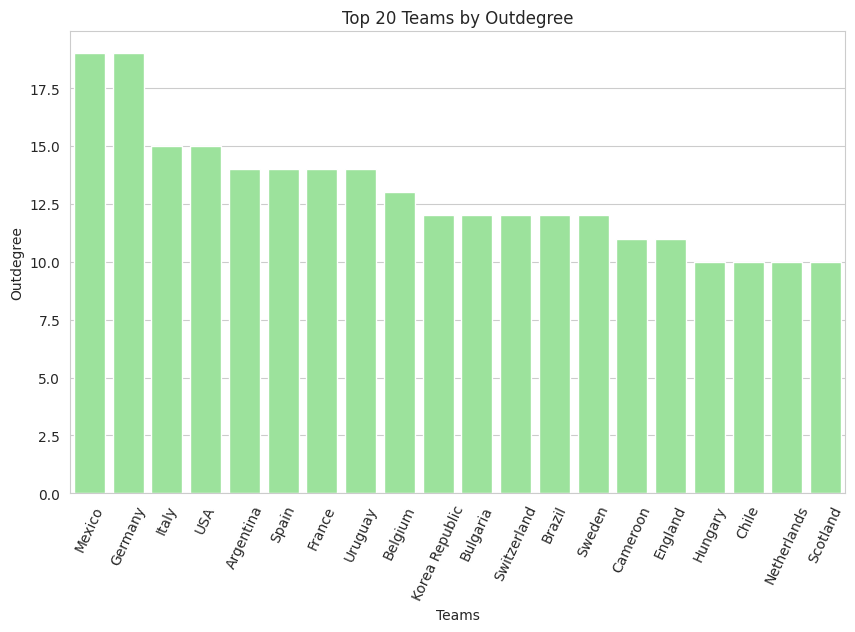

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='outdegree', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='outdegree', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Outdegree')
plt.xlabel('Teams')
plt.ylabel('Outdegree')
plt.xticks(rotation=65)
plt.show()

### Degree

Representa o número total de conexões de entrada e saída de um time (jogos que o time venceu ou perdeu). Times com alto degree participaram de muitas partidas, tanto vencendo quanto perdendo (empate desconsiderado).

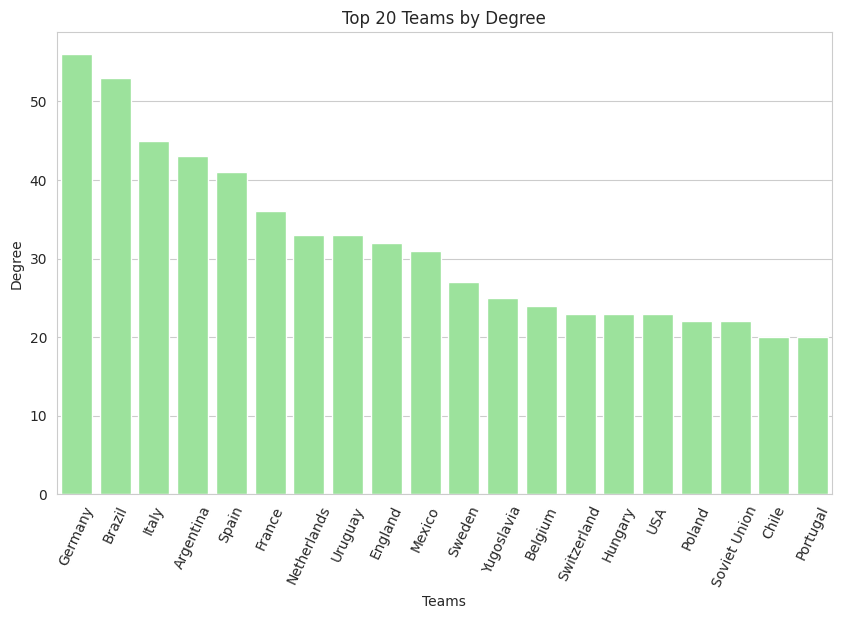

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='degree', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='degree', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Degree')
plt.xlabel('Teams')
plt.ylabel('Degree')
plt.xticks(rotation=65)
plt.show()

### Weighted In-degree

Considera o peso das arestas, ou seja, o número de vezes que um time venceu outro em jogos repetidos. Quanto maior o weighted in-degree de um time, mais vezes ele venceu (considerando o número de vitórias repetidas contra os mesmos adversários).

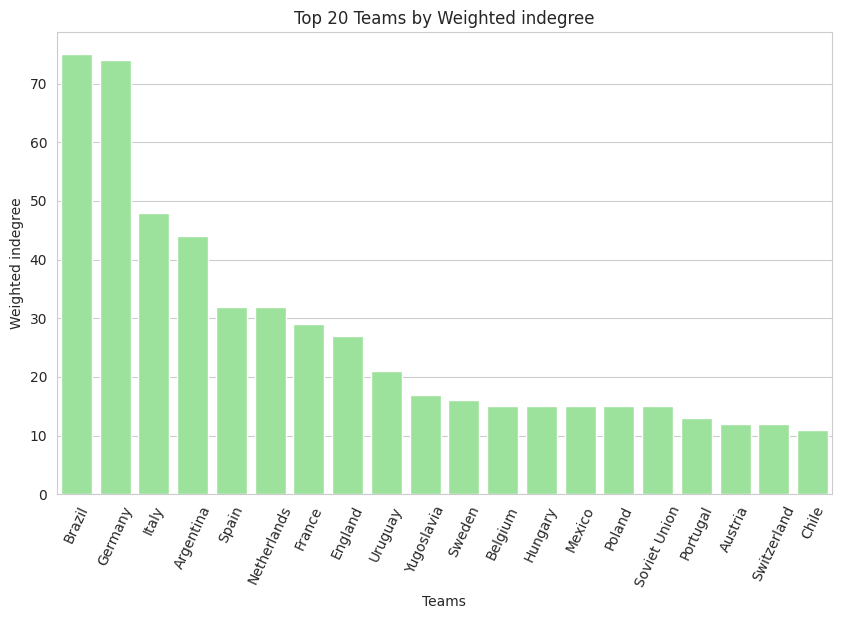

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='weighted indegree', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='weighted indegree', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Weighted indegree')
plt.xlabel('Teams')
plt.ylabel('Weighted indegree')
plt.xticks(rotation=65)
plt.show()

### Weighted Out-degree

O número ponderado de arestas saindo do nó. Considera o número de vezes que um time perdeu para outro. Times com alto weighted out-degree perderam várias vezes para os mesmos adversários.

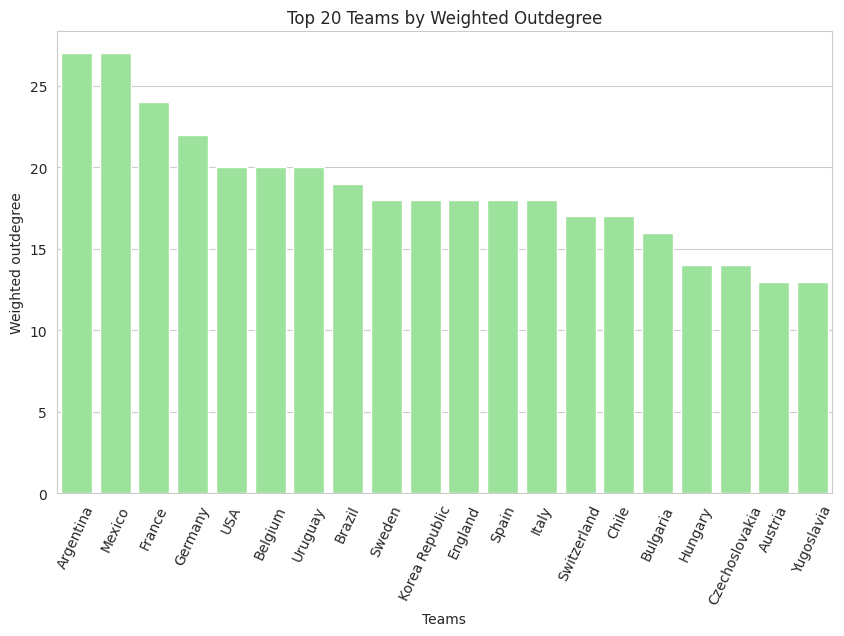

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='weighted outdegree', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='weighted outdegree', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Weighted Outdegree')
plt.xlabel('Teams')
plt.ylabel('Weighted outdegree')
plt.xticks(rotation=65)
plt.show()

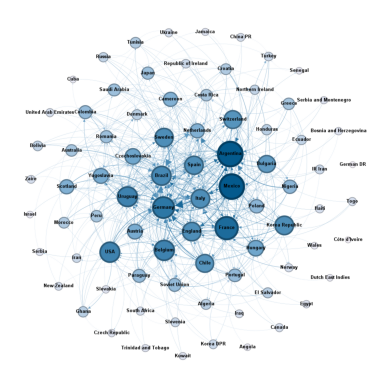

In [ ]:
img = mpimg.imread('/content/drive/My Drive/world-cup-archives/matches_weighted_outdegree.png')

plt.imshow(img)
plt.axis('off')
plt.show()

### Weighted Degree

A soma dos valores ponderados de in-degree e out-degree. Mostra o número total de partidas que o time participou, considerando múltiplas vitórias ou derrotas contra os mesmos adversários. Um time com alto weighted degree participou de muitas partidas, tanto ganhando quanto perdendo, incluindo jogos repetidos.

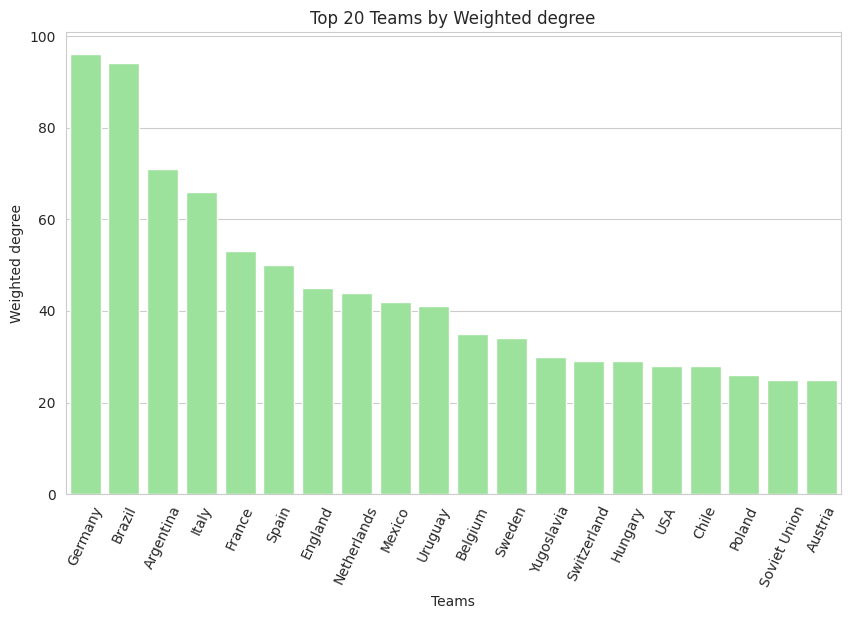

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='weighted degree', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='weighted degree', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Weighted degree')
plt.xlabel('Teams')
plt.ylabel('Weighted degree')
plt.xticks(rotation=65)
plt.show()

### Closeness Centrality

Mede a proximidade de um nó (time) a todos os outros nós no grafo. É o inverso da soma das distâncias mais curtas de um nó a todos os outros. Times com alta closeness centrality podem ser interpretados como tendo influência direta sobre muitos outros times, ou seja, suas vitórias ou derrotas os conectam rapidamente a outros times na rede.

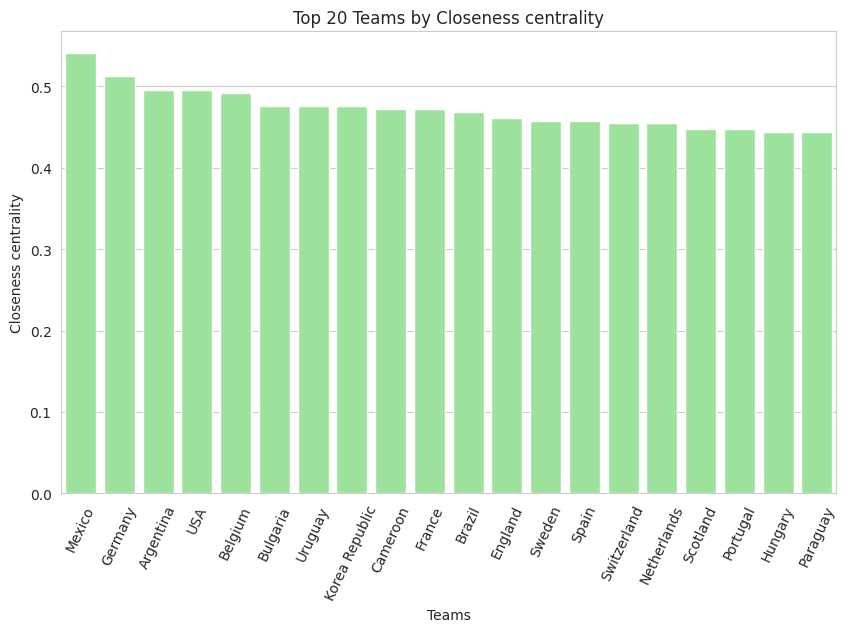

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='closenesscentrality', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='closenesscentrality', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Closeness centrality')
plt.xlabel('Teams')
plt.ylabel('Closeness centrality')
plt.xticks(rotation=65)
plt.show()

### Betweeness Centrality

Mede o número de vezes que um nó (time) aparece no caminho mais curto entre dois outros nós. Indica o quão central é o nó no fluxo de vitórias/derrotas.Times com alta betweenness centrality são influentes na rede, pois eles frequentemente "mediam" a comunicação ou fluxo de jogos entre outros times (pivôs em vitórias/derrotas indiretas).

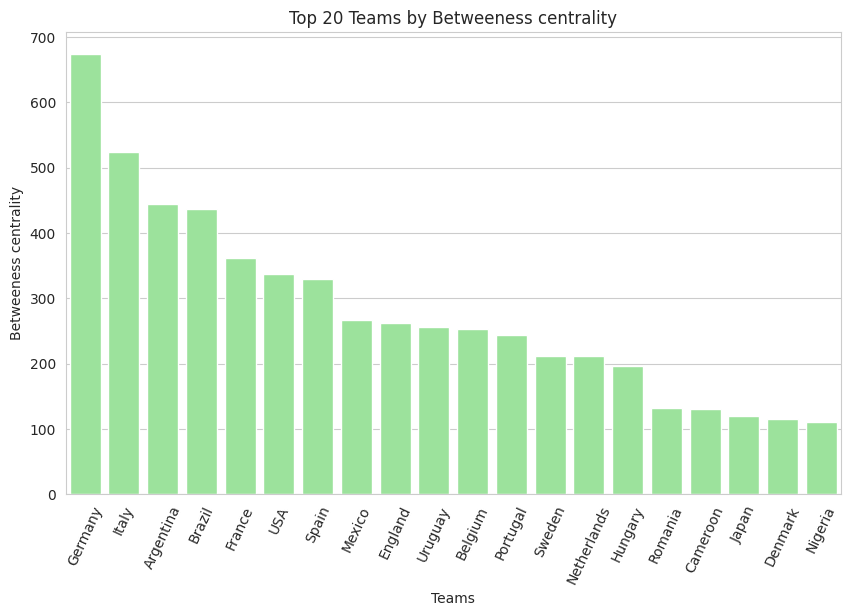

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='betweenesscentrality', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='betweenesscentrality', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Betweeness centrality')
plt.xlabel('Teams')
plt.ylabel('Betweeness centrality')
plt.xticks(rotation=65)
plt.show()

### Authority

Nessa métrica, um nó é considerado uma "autoridade" se ele é apontado por muitos "hubs". Em termos simples, times que foram derrotados por muitos outros times considerados hubs. Times com alta autoridade são aqueles que perderam para times considerados muito "influentes" (times que derrotaram muitos adversários). Para calcular essa métrica, foi utilizado o parâmetro ε = 1.0E-4, que define o nível de precisão do algoritmo, determinando a convergência para resultados mais precisos.

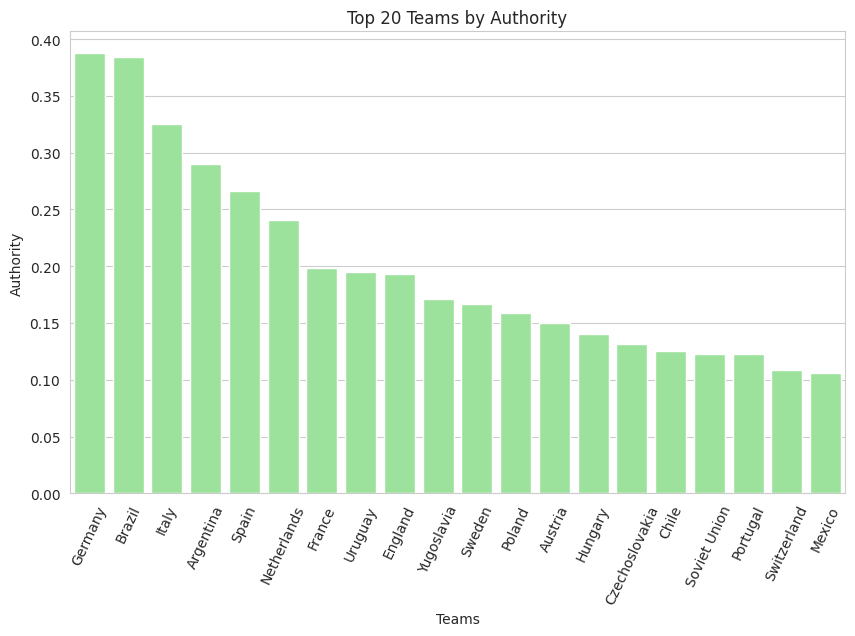

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='Authority', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='Authority', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Authority')
plt.xlabel('Teams')
plt.ylabel('Authority')
plt.xticks(rotation=65)
plt.show()

### Hub

Times considerados "hubs" são aqueles que apontam para muitas "autoridades". Um time é um hub se derrotou muitos times que são considerados fortes ou influentes. Times com alta pontuação de hub são os que derrotaram vários times importantes (ou seja, times que são reconhecidos como autoridades). Para calcular essa métrica, foi utilizado o parâmetro ε = 1.0E-4, que define o nível de precisão do algoritmo, determinando a convergência para resultados mais precisos.

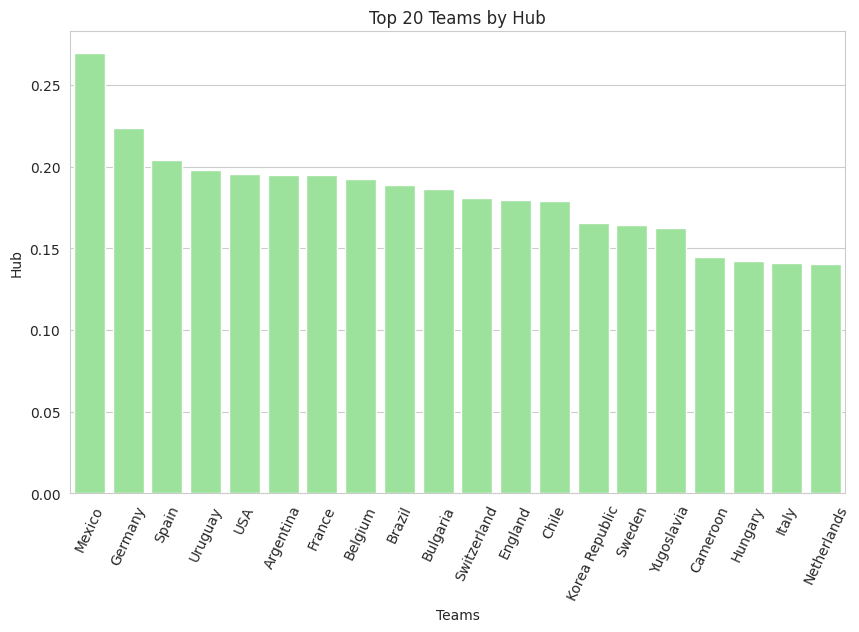

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='Hub', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='Hub', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by Hub')
plt.xlabel('Teams')
plt.ylabel('Hub')
plt.xticks(rotation=65)
plt.show()

### PageRank

Uma adaptação do algoritmo PageRank do Google, que mede a importância de um nó com base nas conexões que ele recebe. Times com alto PageRank são aqueles que venceram times que também têm muitas vitórias, o que os torna mais "importantes" na rede de vitórias/derrotas. Na aplicação desta métrica, foram utilizados os parâmetros Epsilon = 0.001 (que define a precisão da convergência do cálculo) e Probability = 0.85 (representando a probabilidade de seguir uma conexão para outro nó, enquanto 0.15 é a probabilidade de "teleportar" para qualquer outro nó aleatoriamente).

In [ ]:
df_matches_gephi['pageranks'].describe()

NameError: name 'df_matches_gephi' is not defined

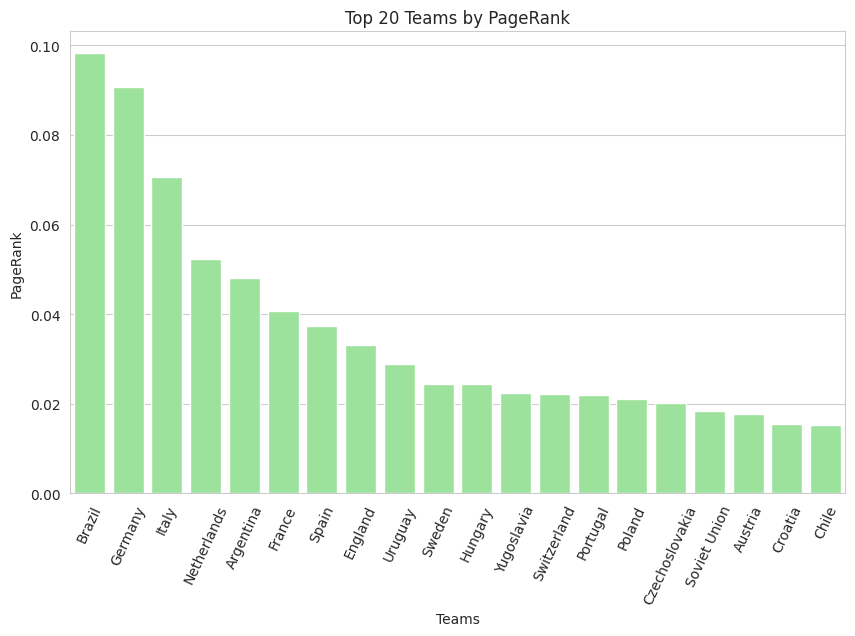

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='pageranks', ascending=False)
df_pagerank = df_matches_gephi.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='pageranks', data=df_pagerank, color='lightgreen')
plt.title('Top 20 Teams by PageRank')
plt.xlabel('Teams')
plt.ylabel('PageRank')
plt.xticks(rotation=65)
plt.show()

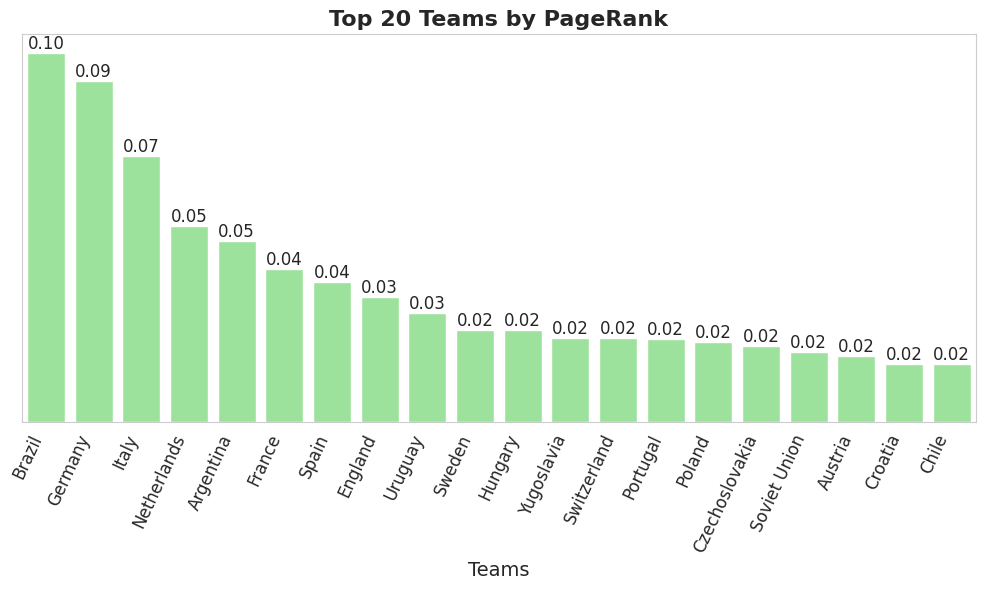

In [ ]:
df_matches_gephi = df_matches_gephi.sort_values(by='pageranks', ascending=False)
df_pagerank = df_matches_gephi.head(20)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='label', y='pageranks', data=df_pagerank, color='lightgreen')

plt.title('Top 20 Teams by PageRank', fontsize=16, fontweight='bold')
plt.xlabel('Teams', fontsize=14)
plt.ylabel('')

plt.yticks([])

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=12)

plt.xticks(rotation=65, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

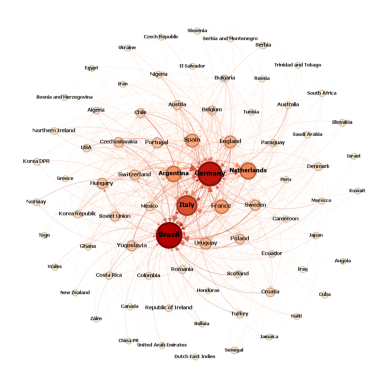

In [ ]:
img = mpimg.imread('/content/drive/My Drive/world-cup-archives/matches_pagerank.png')

plt.imshow(img)
plt.axis('off')
plt.show()